In [1]:
# Araç Yakıt Tüketimi Tahmini (Türkçe hali localimde kayıtlı isteyen yazabilir.)
# These are the steps I took while creating this notebook.
# 1-) Import Library
# 2-) Problem Description
        # import data
    
# 3-) Dealing with missing value
# 4-) EDA
# 5-) Detect outliers and drop them.
# 6-) Feature Engineering -> One hot encoding and our data has positive skewness so we need to deal with that.
# 7-) Test-train split and Standardization
# 8-) Linear Regression 
# 9-) Regularization tecniques 
    # a-)Regularization1 -> Ridge Regression
    # b-)Regularization2 -> Lasso Regression
    # c-)Regularization3 -> ElasticNet Regression
    # her regularizationdan sonra elimizde mse değeri olacak ve bunları karsılaştıracam (after each regularization we will have mse value and compare them) 
# 10-) XGBoost 
# 11-)Averaging Models --> Bu 5 farklı ML modelini kullandık ve bu modelleri birleştirip etkili bir model yapmaya calışıcam (We used these 5 different ML models and I will try to combine these models and make an effective model.)

# Import Library

In [2]:
# Import Library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# skewness değeri için scipy kullanacağım (numpy da olur)
from scipy import stats
from scipy.stats import norm, skew


from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# XGBoost
import xgboost as xgb

# warning 
import warnings
warnings.filterwarnings('ignore')

# Problem Description

In [3]:
# Problem Description
# Aracların özelliklerine göre yakıt tüketimi değişir.Araçların özelliklerine göre ne kadar yakıt yakacağını tahmin etmeye calışıcam
# Bu tahmini yapabilmek için kullancağım attribute lar.

#Attribute Information:

#mpg: continuous -->  mile per galo yani 100 km de ne kadar yakıt tükettiği
#cylinders: multi-valued discrete --> motor içerisimde bulunan silindir sayısı 4 ile 8 arasında değişir.
#displacement: continuous --> motorun içerisindeki motor inçi
#horsepower: continuous --> motorun beygir gücü
#weight: continuous # --> aracın ağırlıgı (kg olarak değil paund olarak verilmiş)
#acceleration: continuous --> ivme , 0 dan 100 km hıza ne kadar sürede ulaştıgı
#model year: multi-valued discrete --> aracın üretim yılı
#origin: multi-valued discrete --> aracın kökeni.Bu avrupa , abd ve japonya. 1 2 3 olarak verilmiş
#car name: string (unique for each instance) --> aracların isimleri

In [4]:
# Import Data

In [5]:
data = pd.read_csv("auto-mpg.data")
data.head()
#verimizi import ettik ancak belli başlı problemler var bunları çözme

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...


In [6]:
# First, I wrote down the attributes given to me in order as a list. I did not add vehicle names because I will not be interested in them.
column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year", "Origin"]

# then I import the yield again to solve the above problem

data = pd.read_csv("auto-mpg.data", names = column_name)

# names -> renaming the column using this argument

data.head()
# When we examine the output below, the first column says 18.0 8 307.0 130.0 3504. 12.
# This means that the values ​​that should be in other columns have been moved to a single column, so I have to fix this. -> If you open the data file and look, you can understand this.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0 8 307.0 130.0 3504. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15.0 8 350.0 165.0 3693. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18.0 8 318.0 150.0 3436. 11...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.0 8 304.0 150.0 3433. 12...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17.0 8 302.0 140.0 3449. 10...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data = pd.read_csv("auto-mpg.data", names = column_name, comment = "\t", sep = " ", skipinitialspace = True)
data.head()

# because the data is separated by spaces --> sep = " "
# yorumları tablamak için --> comment = "\t"
# The read_csv function allows you to use the comment parameter if you want to skip comment lines while reading the CSV file. The value assigned to the comment parameter determines the start of comment lines in the CSV file. If this value is a tab character (\t), if a tab character is found at the beginning of any line in the CSV file, these lines are considered comment lines and are skipped.

# If a CSV file is separated by a space character and the columns are separated by spaces, you can correctly read a file separated by this space character by setting sep=" "

# If skipinitialspace=True is set, read_csv skips column names or cell contents that begin with space characters (for example, space or tab characters). This can be useful in some cases where the data file is formatted irregularly or column names are surrounded by spaces.

#If skipinitialspace=True is set, the read_csv function will skip the leading spaces of each column and read the column data starting from the characters after the spaces.

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [8]:
data = pd.read_csv("auto-mpg.data", names = column_name, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)
data.head()
# na_values = "?"  nedir ?

#When we open the dataset and look at it? We see it's worth
# this ? I can't use it as na_values ​​= "?" well ? we convert those to NaN

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [9]:
#I change the name of the dependent variable
data = data.rename(columns = {"MPG":"target"})
data.head()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [10]:
# Basitce veriyi inceleyelim
print("Data shape: ",data.shape)

Data shape:  (398, 8)


In [11]:
data.info()
# 398 sample var ; 0 dan 397 ye kadar indexlenmiş
# There is a missing value in the Horsepower variable.
# ATTENTION
# Although the "origin" variable appears as int64, the values ​​it represents are countries, that is, although it appears as a numerical variable, it represents categorical variables.

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 398 entries, 0 to 397

Data columns (total 8 columns):

 #   Column        Non-Null Count  Dtype  

---  ------        --------------  -----  

 0   target        398 non-null    float64

 1   Cylinders     398 non-null    int64  

 2   Displacement  398 non-null    float64

 3   Horsepower    392 non-null    float64

 4   Weight        398 non-null    float64

 5   Acceleration  398 non-null    float64

 6   Model Year    398 non-null    int64  

 7   Origin        398 non-null    int64  

dtypes: float64(5), int64(3)

memory usage: 25.0 KB


In [12]:
describe = data.describe()
describe
#50% represents the median value here.
# Here we can understand skewness.
# When we look at Target;

# When we look at the mean and median values ​​here, we see that they are not the same --> mean > median
# The median is a little further to the left, meaning there is an image with a tail skewed towards the left and towards the right, which means there is "positive skewness".

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


# Imputing Missing Values

In [14]:
# check missing value
print(data.isna().sum())

target          0

Cylinders       0

Displacement    0

Horsepower      6

Weight          0

Acceleration    0

Model Year      0

Origin          0

dtype: int64


In [15]:
data.isna()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False


In [16]:
# There are 6 missing values ​​in horsepower
# Horsepower      6

In [17]:
describe
# When I look at  horsepower the average is 104 and the median is 93
# If we fill in our missing values ​​with the average here, we wouldn't have done anything wrong.
# I will fill in the missing values ​​with the average

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())
# fillna() fonksiyonu ile doldur.

<Axes: xlabel='Horsepower', ylabel='Density'>

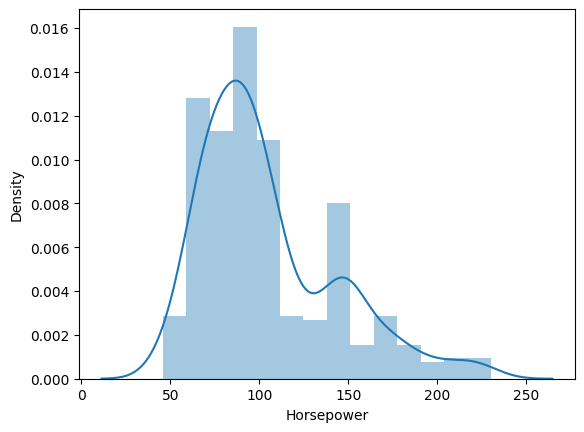

In [19]:
sns.distplot(data.Horsepower)
# we cannot reach this distribution when there is missing data. We must fill in the missing data and look.
# There is positive skewness here.


In [20]:
print(data.isna().sum())
#no other missing values left

target          0

Cylinders       0

Displacement    0

Horsepower      0

Weight          0

Acceleration    0

Model Year      0

Origin          0

dtype: int64


# Exploratory Data Analysis

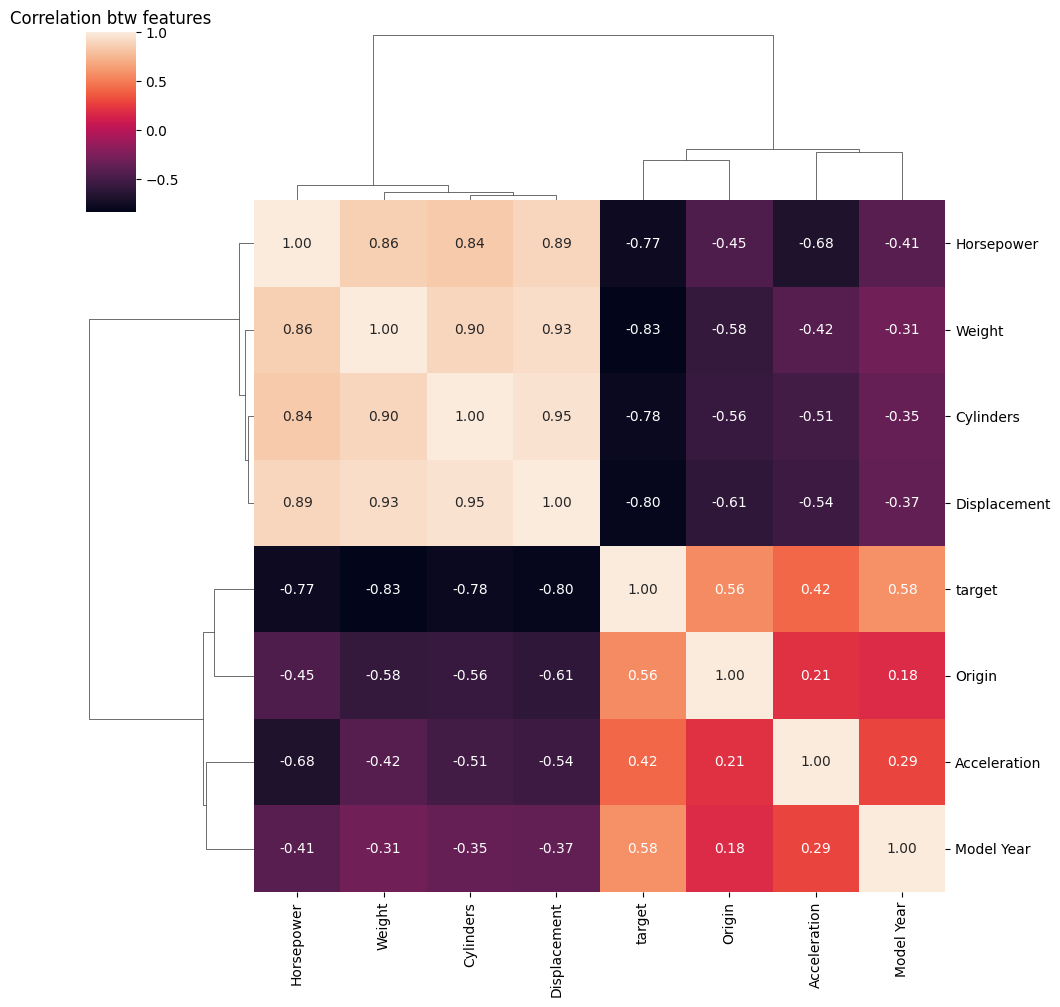

In [22]:
# First, let's look at a correlation matrix since there are numerical values
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()
# we write the numbers in the box with annot = True
# mycomment
# There is a high correlation in the light colored part in the upper left.
# Our target variable, that is, the variable that represents fuel consumption, is proportional to the test variables "horsepower", "weight", "cylinder" and "displacement".


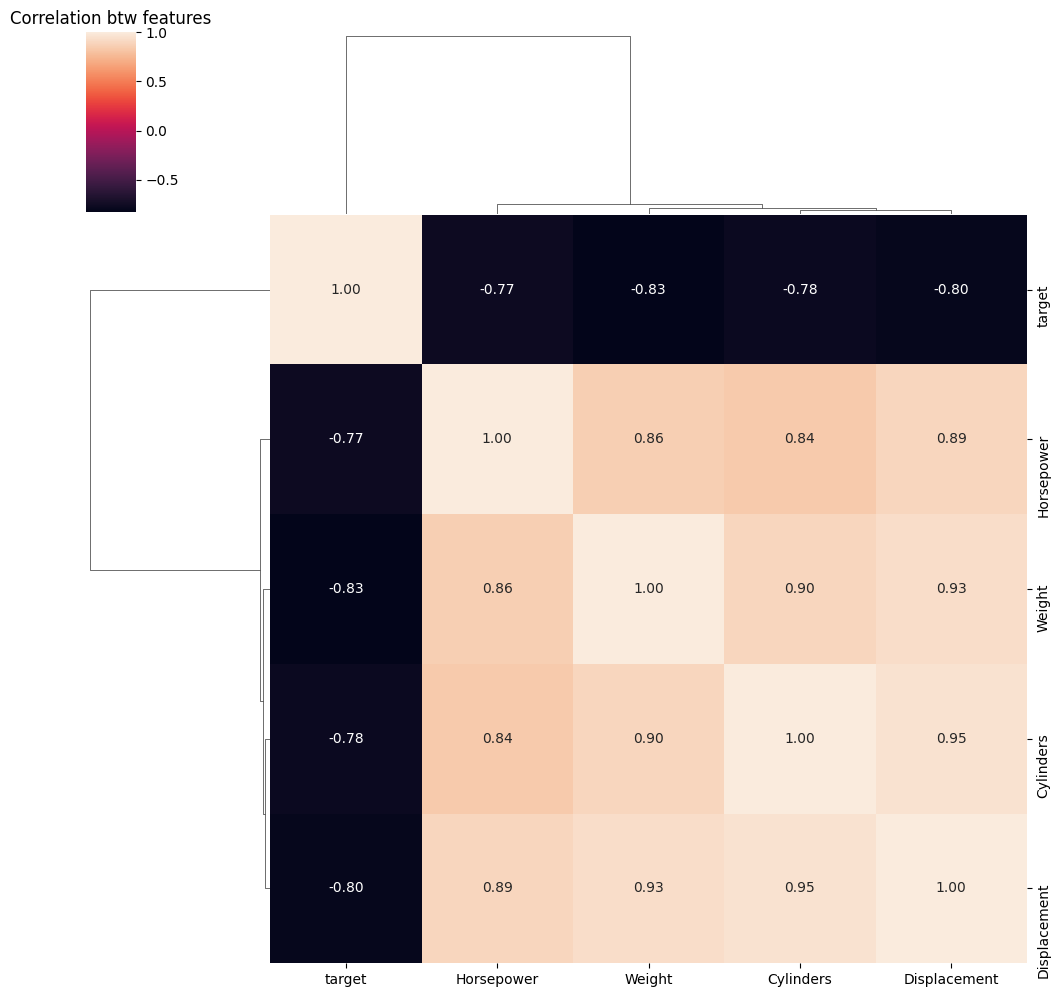

In [23]:
# I put a limit, that is, a threshold, in order to see the correlation matrix more easily, and in addition, pairplot makes it easier to process.threshold = 0.75 # sınır belirledim. Bu negatif de olabilir pozitif de olabilir.

# this is filtering so I get variables that are more than 0.75 related to target

filtre = np.abs(corr_matrix["target"])>threshold # numpy kütüphanesinin içindeki abs() fonksiyonu ile mutlak değer aldım.
corr_features = corr_matrix.columns[filtre].tolist()

# here I create the correlation matrix.
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

#if you're confused in the data[corr features].corr() part, do it in the previous step of the variable
# yani
#corr_2 = data[corr_features].corr()
#sns.clustermap(corr_2, annot = True, fmt = ".2f")

In [24]:
#My aim is to deal only with variables that have a certain correlation superordinate.
corr_matrix["target"]
# I got the variables that have a relation to the target variable.

target          1.000000
Cylinders      -0.775396
Displacement   -0.804203
Horsepower     -0.771437
Weight         -0.831741
Acceleration    0.420289
Model Year      0.579267
Origin          0.563450
Name: target, dtype: float64

In [25]:
np.abs(corr_matrix["target"])>threshold

target           True
Cylinders        True
Displacement     True
Horsepower       True
Weight           True
Acceleration    False
Model Year      False
Origin          False
Name: target, dtype: bool

In [26]:
corr_matrix.columns[filtre] #these variables are more than 0.75 related to target.
# I will convert these into a list and put them into a new variable.

Index(['target', 'Cylinders', 'Displacement', 'Horsepower', 'Weight'], dtype='object')

In [27]:
data[corr_features]

,target,Cylinders,Displacement,Horsepower,Weight
0,18.0,8,307.0,130.0,3504.0
1,15.0,8,350.0,165.0,3693.0
2,18.0,8,318.0,150.0,3436.0
3,16.0,8,304.0,150.0,3433.0
4,17.0,8,302.0,140.0,3449.0
...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0
394,44.0,4,97.0,52.0,2130.0
395,32.0,4,135.0,84.0,2295.0
396,28.0,4,120.0,79.0,2625.0


# Multicollinearity ( eşdüzlemlilik.)

In [29]:
#Multicolinearity refers to a situation in which multiple independent variables (predictors or features) are highly correlated with each other in a regression model.
#In this case, there is a strong relationship or similarity between the independent variables, which can make the regression model's estimates and results misleading.
# In other words, if the information obtained with 1 feature is obtained with 4-5 features, this situation is called coplanarity.

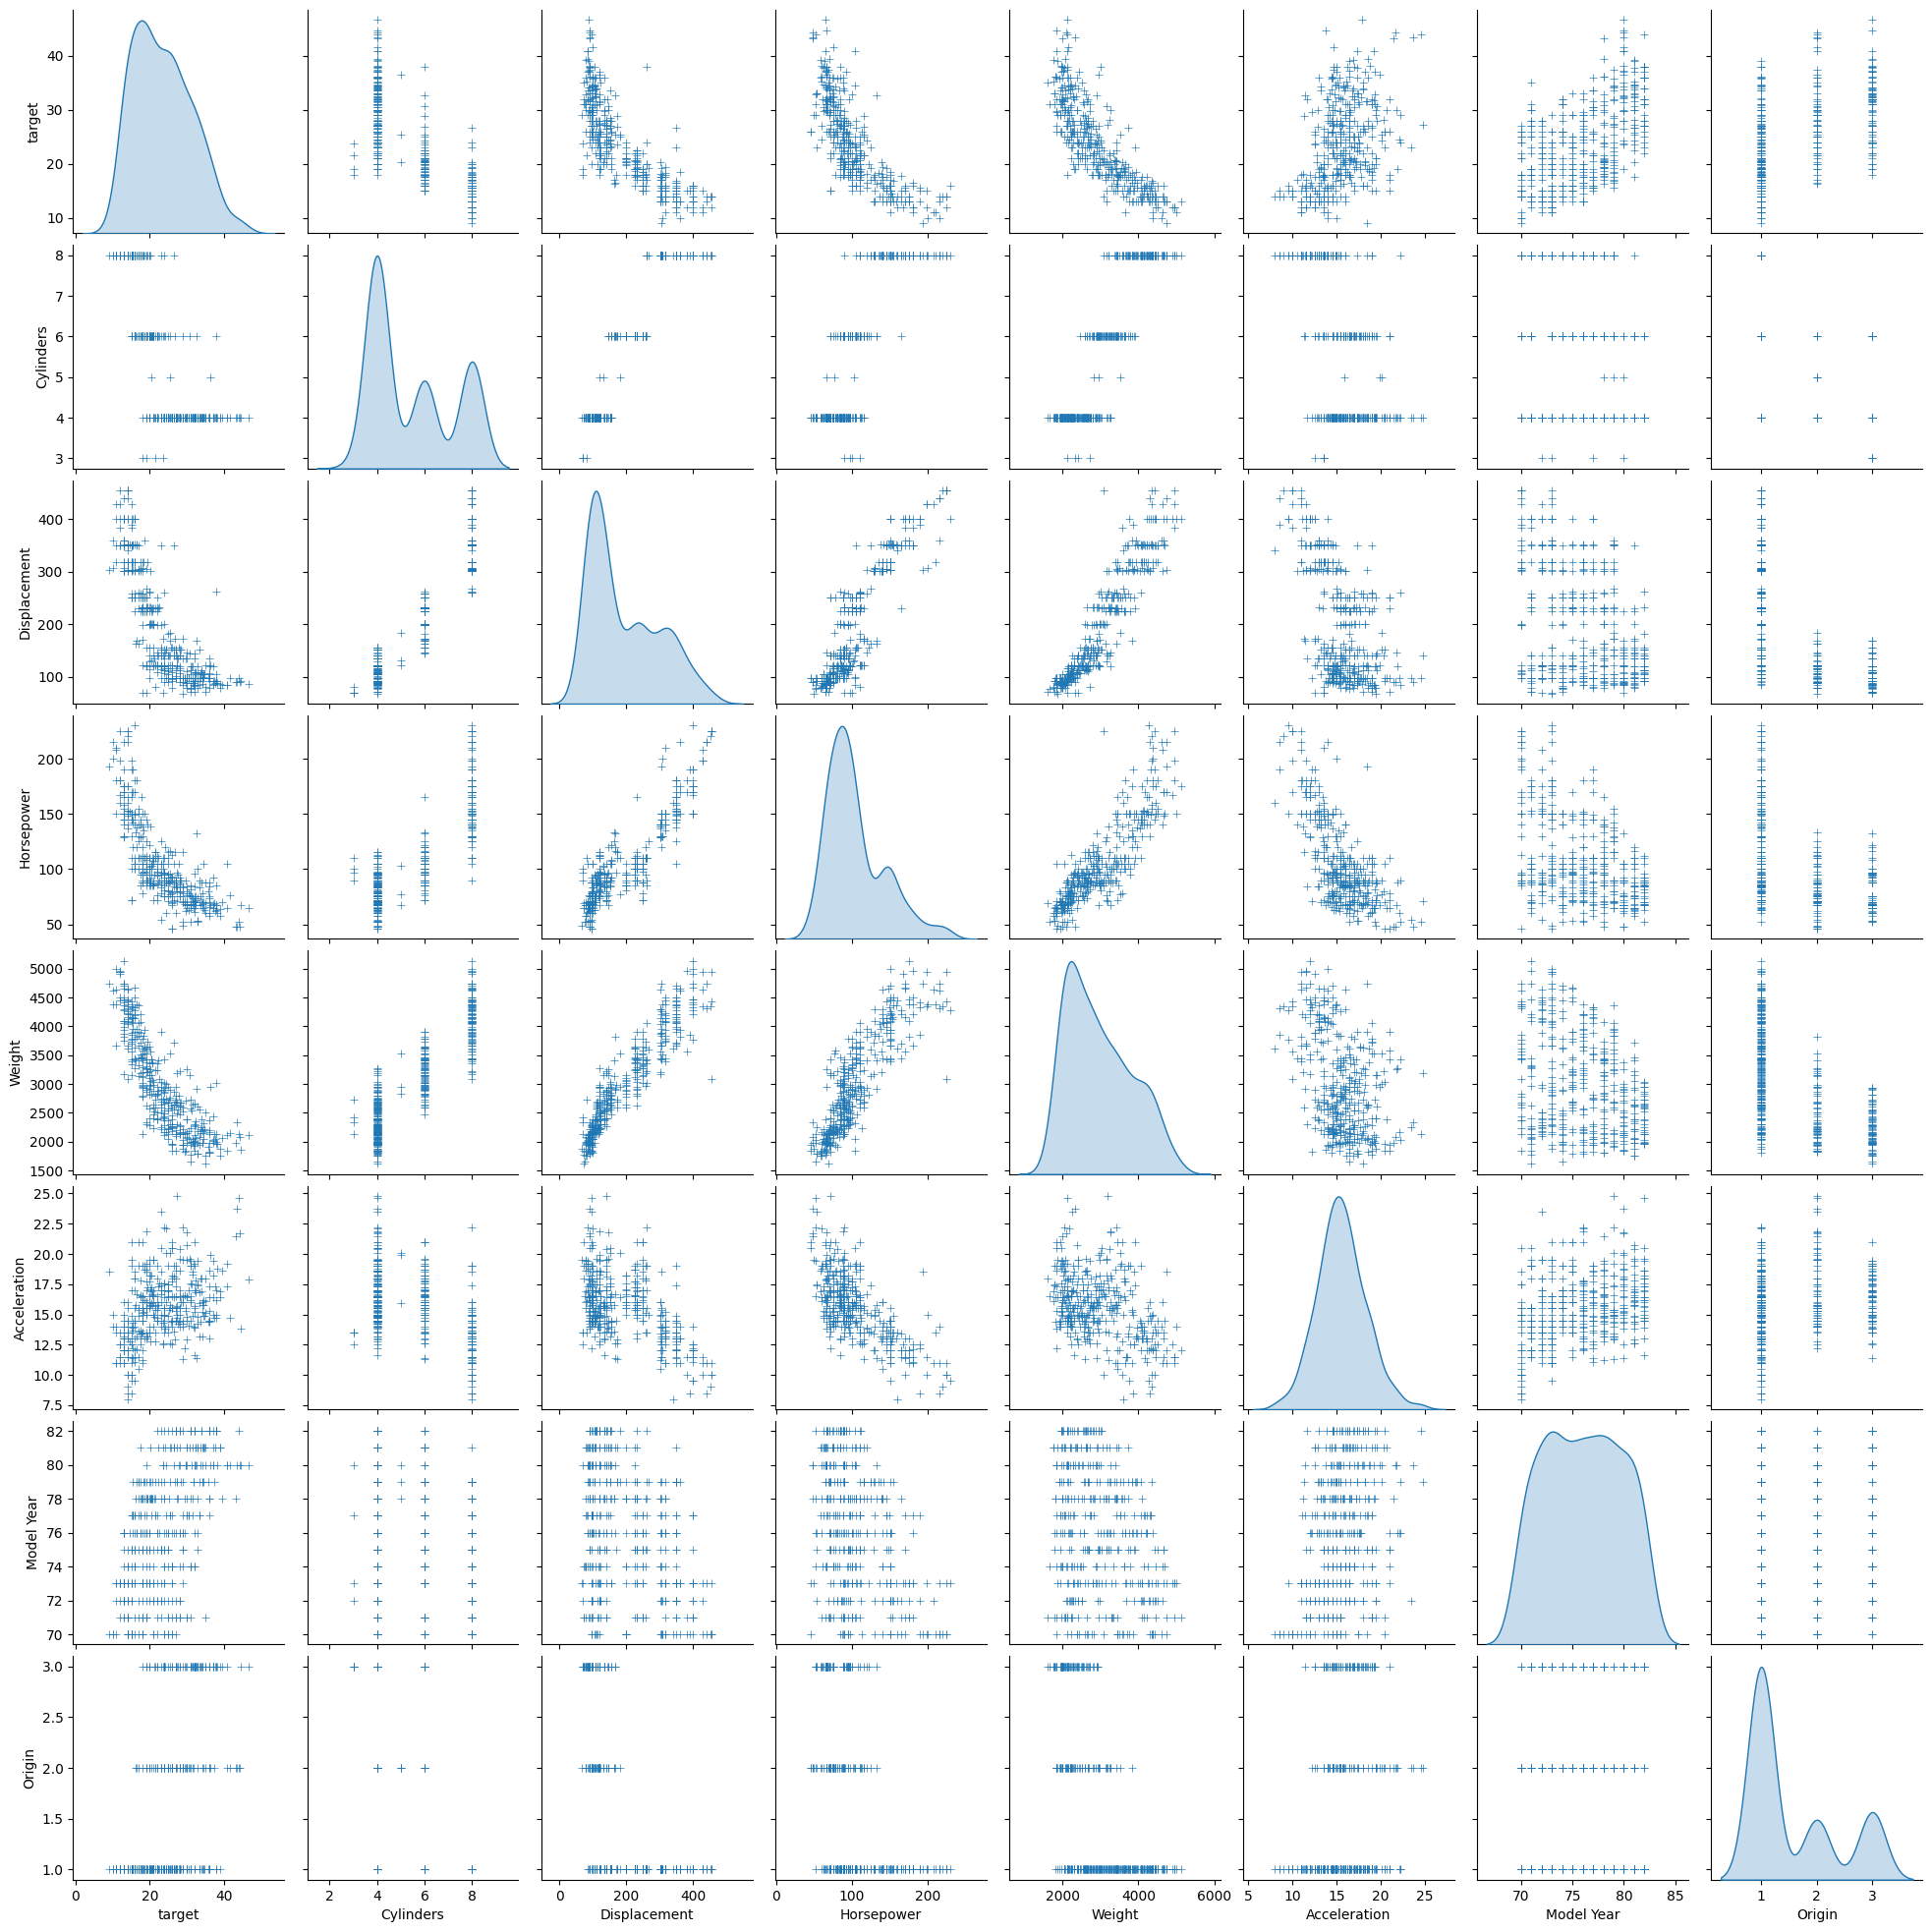

In [30]:
#Let's take a look at all the features with # pair plot.
sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

In [31]:
# Comment of this pairplot:
# First, let's select the target on the x-axis and make comments about the variables on the y-axis.
# Let's look at target and target -> There is a tail extending to the right, that is, there is positive skewness.
# Let's look at cylinder with target -> It seems like there is categorical data here. Apart from 3 5-cylinder and 4 3-cylinder, we can actually reduce it categorically and use it in the feature extraction section.
# Let's look at the displacement with the target --> There is an inverse proportion.
# Let's look at horsepower with Target --> There is an inverse proportion.
# Let's look at target and weight --> There is an inverse proportion.
# Let's look at acceleration with target -> there does not seem to be a relationship
# Let's look at target and model year -> there does not seem to be a relationship
# Let's look at the target and origin year -> there does not seem to be a relationship. Since it has 3 values, it can be considered as categorical data.

#Let's see if there is an Outlier.
# Let's look at Displacement with Displacement -> it may be outlier because it is slanted to the left
# Let's look at the weight with displacement --> it can be outlier like one point slightly above.
# Let's look at the weight with horsepower -> it may be outlier like one point a little higher.

# Short note:
# We can think of Cylinders and origin variables as categorical variables. So, these 2 variables are given to us numerically, but I say they can be categorical.
# In the feature engineering section, I can convert these 2 variables into categorical variables.
# Therefore, I examine these Cylinders and origin variables in more detail.

In [32]:
# For cylinders

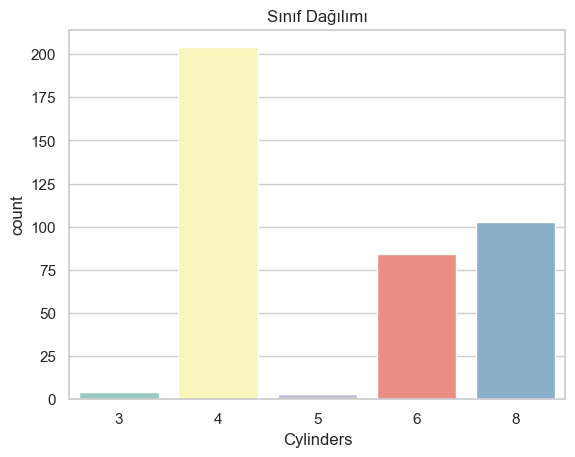

In [33]:
sns.set(style="whitegrid")  # Grafik stili belirleme 
sns.countplot(x=data["Cylinders"], data=data, palette="Set3")  # countplot oluşturma
plt.title('Sınıf Dağılımı')
plt.show()

In [34]:
# For Origin

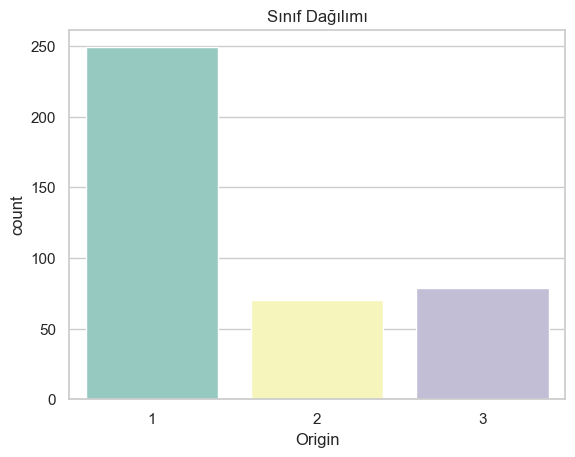

In [35]:
sns.set(style="whitegrid")  # Grafik stili belirleme 
sns.countplot(x=data["Origin"], data=data, palette="Set3")  # countplot oluşturma
plt.title('Sınıf Dağılımı')
plt.show()
# 1-> ABD
# 2-> Europa
# 3-> Japan

# Outliers

In [37]:
# Let's continue with the box plot to see the outlines.

<Axes: xlabel='Acceleration'>

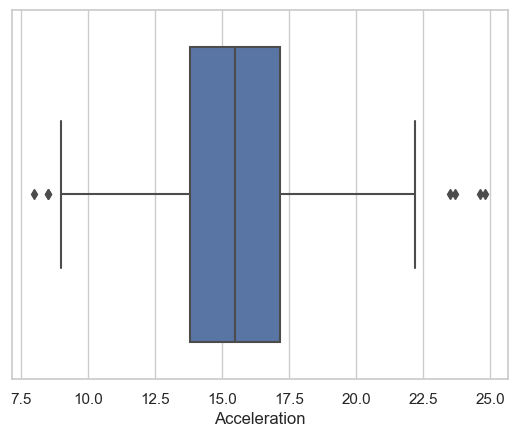

In [38]:
plt.figure()
sns.boxplot(x = data["Acceleration"], data = data, orient = "v")

In [39]:
# Instead of creating a plot for each variable one by one, we can shorten our work with a for loop.

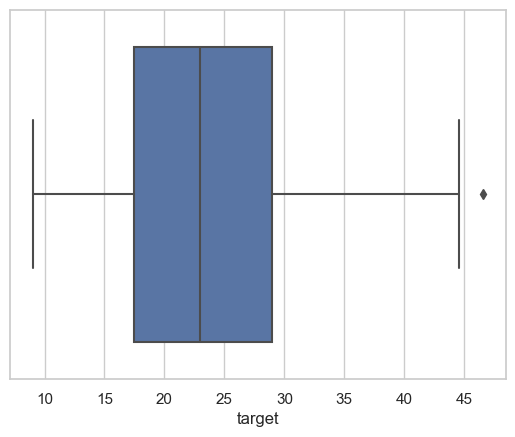

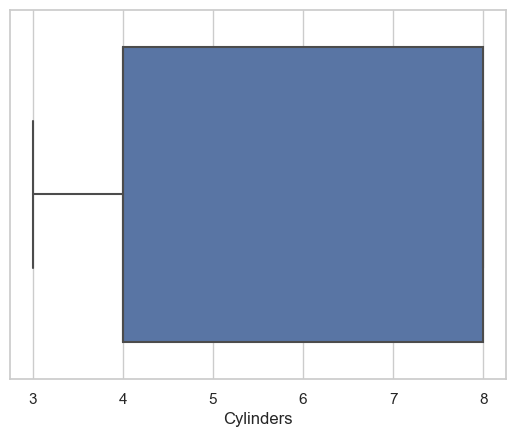

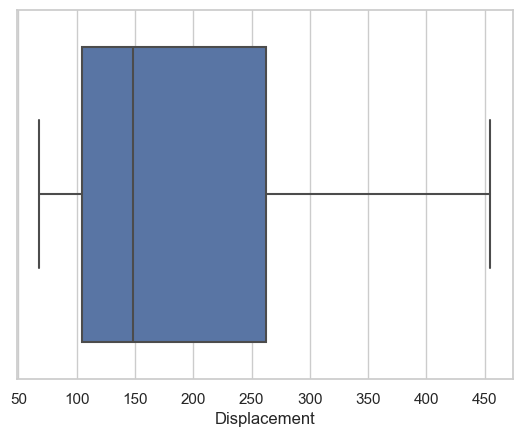

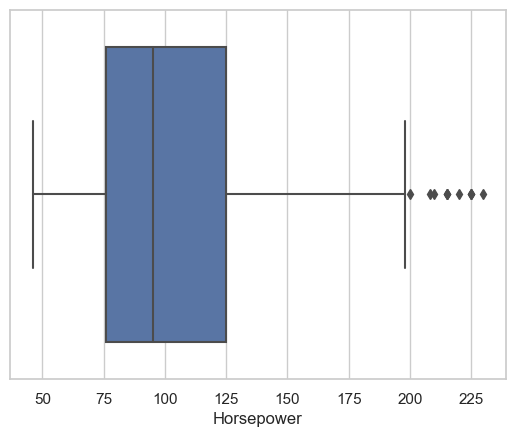

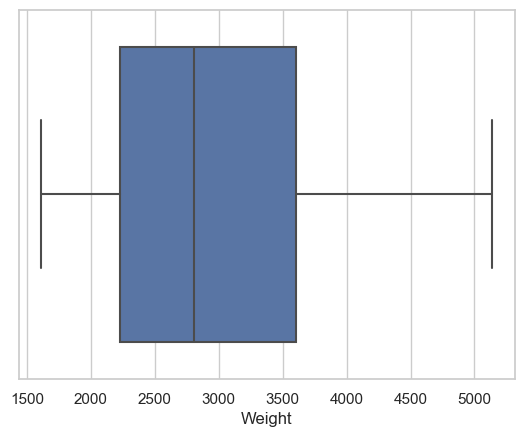

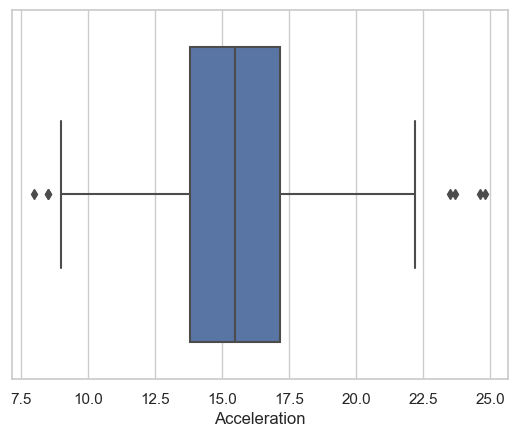

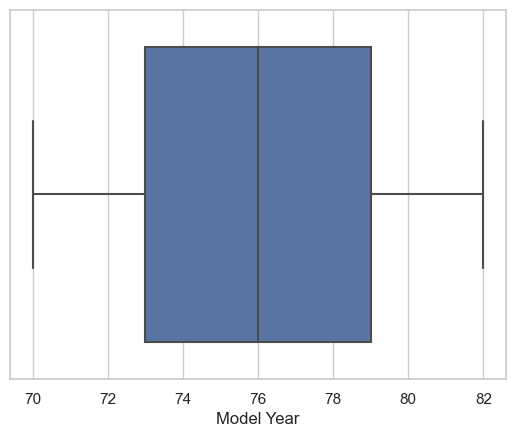

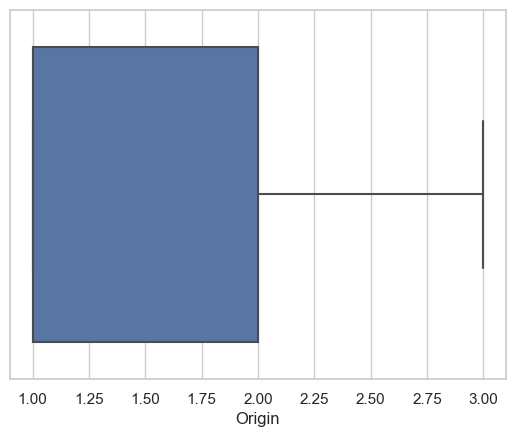

In [40]:
# for döngüsü ile her bir değişkenim için boxplot oluşturuyorum
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "h")
# orient="v -> Vertical ->This means the boxes will be drawn vertically.
# orient="h" --> Horizontal
# Comment !
# Outside my right and left lines -> outliers
# Accelatation --> looks like there is an outlier
# Horsepower --> looks like there is an outlier
# Target --> There is 1 outlier, but I will not go out.
# Others have no outliers.

In [41]:
# I have detected an outlier in Horsepower and Accelatation !
# I have to take these off.

In [42]:
# Detection and Removal of Outliers

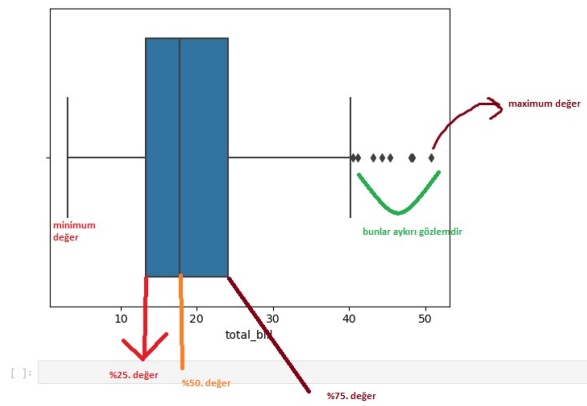

In [43]:
# 25% --> Q1 ie lower quartile
#50%. --> median i.e. Q2
#75%. --> Q3 ie upper quartile
# IOR --> Q3 - Q1
# The rightmost outlier limit -> Q3 + 1.5*IOR (the number 1.5 here is not a clear rule, it varies depending on the data, but 1.5 is the lower limit, so 1.2 cannot be taken.)
# The leftmost outlier limit --> Q1 - 1.5*IOR (the number 1.5 here is not a clear rule and varies depending on the data.)
# threshold here is 1.5

In [44]:
# Those to the right of the rightmost line and those to the left of the leftmost line are outliers.

In [45]:
# First clear the outliers in the Horsepower variable!

In [46]:
# I will use the above formula for this.
# I will calculate Q1, Q3, IOR.

In [47]:
thr = 2 # ben threshold 2 alıcam yani Q1 - 2*IOR ve Q3 + 2*IOR hesaplayacağım.

In [48]:
horsepower_desc = describe["Horsepower"]
horsepower_desc
# Q1 , Q3 -> 4. ve 6. indexde

count    392.000000
mean     104.469388
std       38.491160
min       46.000000
25%       75.000000
50%       93.500000
75%      126.000000
max      230.000000
Name: Horsepower, dtype: float64

In [49]:
q1_hp = horsepower_desc[4] # Q1
q1_hp

75.0

In [50]:
q3_hp = horsepower_desc[6] # Q3
q3_hp

126.0

In [51]:
# Calculate IOR
IQR_hp = q3_hp - q1_hp

In [52]:
# üst ve alt çizgiyi belirle yani  Q1 - 2*IOR ve Q3 + 2*IOR hesapla
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp

In [53]:
print(top_limit_hp)
print(bottom_limit_hp)

228.0

-27.0


In [54]:
data["Horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: Horsepower, Length: 398, dtype: float64

In [55]:
filter_hp_bottom = data["Horsepower"] > bottom_limit_hp # en alt sınırdan büyük olanları al
filter_hp_top = data["Horsepower"] < top_limit_hp # en üst sınırdan kücük olanları al
# this way we discard those above and below the limits

filter_hp = filter_hp_bottom & filter_hp_top # I combined the bottom and top filters

In [56]:
filter_hp

0      True
1      True
2      True
3      True
4      True
       ... 
393    True
394    True
395    True
396    True
397    True
Name: Horsepower, Length: 398, dtype: bool

In [57]:
# bu filtreyi dataya uygulayacagım.
data = data[filter_hp]
data

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [58]:
# Secondly, clear the outliers in the Acceleration variable!
# same logic same steps
acceleration_desc = describe["Acceleration"]
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc # q3 - q1
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc] 

In [59]:
print("Data shape: ",data.shape)
# If we look back at the beginning, I see that it is (398 , 8).
# Now it's (395, 8)
# so 3 outliers were deleted.

Data shape:  (395, 8)


#  Feature Engineering

In [61]:
# Under this heading, I will handle skewness and one hot encoding.

In [62]:
# Skewness

In [63]:
#Skewness
# I will address the skewness found in the dependent and independent features of our data.

# Distortion according to what? --> Skewness relative to normal distribution
# In normal distribution, mean, median and mode values ​​are all equal to each other, that is, they are the same value and have a symmetrical structure around the mean.
# How to calculate Skewwnes value?
# The 3rd moment of the data gives us the skewness value. (1st moment -> mean, 2nd moment -> Std, 3rd moment -> mode)
# The third moment of data is a statistical term that measures the skewness of the distribution of data points. The third moment shows how skewed (unsymmetrical) a data set is
# The standardized version of the 3rd moment of the data gives us the standardized skewness value.
# If Skew > 1 -> Positive skewness
# if skew < -1 -> Negative skewness
# We learned that there is skewness in the data, what do we do now?
# If there is skewness in the data, there may be outliers of our data in the tail region of the data, and these outliers will negatively affect the regression models.
# Therefore, we need to transform the skewed data into a Gaussian distribution, that is, we need to reduce its skewness and this way our model works better.
# Which method will we use when doing this conversion?
# We will use the log transformation method to convert skewness into a normal distribution. With log transformation, we can transform high-skewed distributions into low-skewed distributions, that is, we can reduce the skew value.
# Attention
# Logarithm conversion is not defined for negative or zero values. So, if there are negative or zero values ​​in your data set, you may need to correct these values ​​in some way beforehand (for example, by adding 1 or omitting these values).

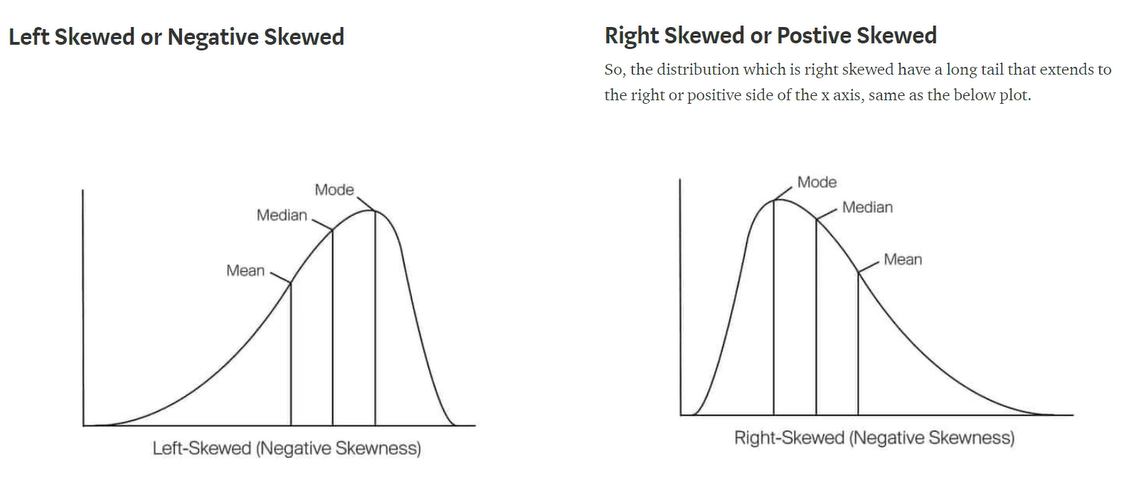

In [64]:
# We will look at the skewness values ​​of the dependent and independent variables in our data.

In [65]:
# First, let's start with the target variable, which is our dependent variable.

<Axes: xlabel='target', ylabel='Density'>

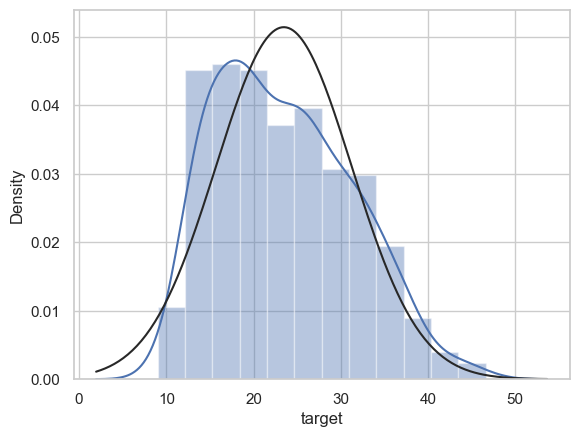

In [66]:
# first, let's look at the distribution of the target variable.
sns.distplot(data.target, fit = norm)
#When we say fit = norm, the normal distribution line is also seen, that is, it draws the black drawing at the bottom.
# There is positive skewness here.

In [67]:
# first, let's find the mean and standard deviation of the target variable -> mu and sigma
#fits the distribution of the variable named "target" in our data set to a normal distribution -> norm.fit()
(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 23.472405063291134, sigma = 7.756119546409932


In [68]:
# I can understand how Gaussian the distribution of the target variable is and whether it is a normal distribution by looking at its histrogram and we can also understand by looking at qqplot.
# qq plot --> quantile-quantile plot
# QQ plot -> is a graphical tool used to visually evaluate how well a data set conforms to a normal distribution or how close it is to another theoretical distribution.

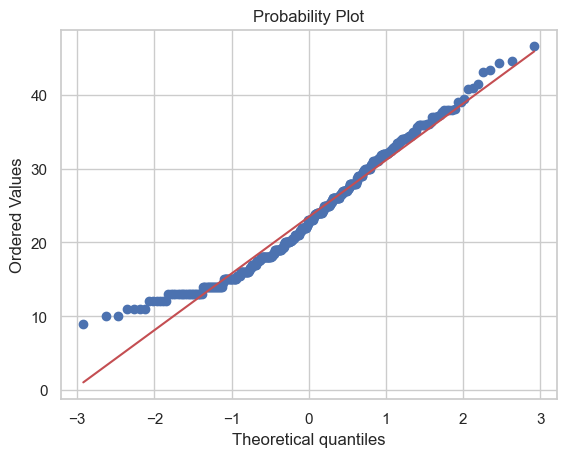

In [69]:
# qq plot -> stats kütüphamesinden probplot() fonksiyonu ile.
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()
# Comment:
# Ordered Values ​​--> Quantiles of Our Data
# Theoretical quantiles -> quantiles of normal distribution
# If our data were perfectly placed on the red line, we would say that it has a normal distribution, but it did not fit, especially in the head and tail part, which lost its normality.

In [70]:
# I will perform log transformation to reduce the skewness value.

In [71]:
# Log transformasyonu
data["target"] = np.log1p(data["target"]) 

<Axes: xlabel='target', ylabel='Density'>

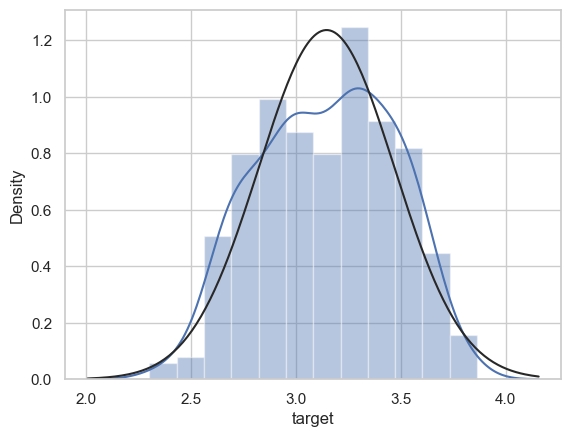

In [72]:
# I visualize again
plt.figure()
sns.distplot(data.target, fit = norm)
#The blue one is our data
# Although not quite normal, we can say that it is close enough to normal

In [73]:
# looks at the mean and std values of our data created after log transformation
(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

mu: 3.146474056830183, sigma = 0.3227569103044823


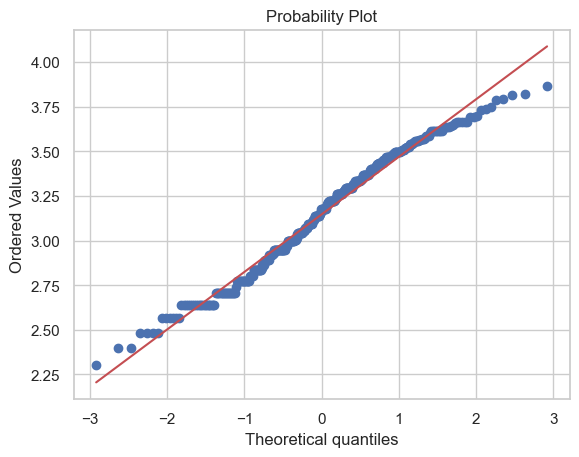

In [74]:
# log transformasyonundan sonra olusan verimizin qq plotu
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()
# There is still a problem at the extreme points, but it seems to have decreased compared to the initial problem
#Since  quantile values ​​also decrease, we can say that the small differences here are not very important for us.

In [75]:
# We solved the problem of dependent variable  skewness.
# Now I will look at the skewness values of the independent variables.

In [76]:
#feature - independent variable 

In [77]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
# Veri setimdeki her değişkene işlem yapılmasını istediğim için apply() fonksiyonu kullanıyorum
#skew() fonksiyonu ile çarpıklık hesaplayacağız
# burada x.dropna() yerine x de yazsak olur çünkü eksik verimiz yok ancak ekssik veri olması ihtimalına karsı x.dropna() yapmalıyız.Null değerleri atmazsak hata alırız.
#yani apply( skew( x.dropna() )   ) olarak düşün bunu da sıralamak için sort_values() fonksiyonu kullandım

# serimizi veri setine dönüştürüyorum
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])

skewness
# Since we corrected our target data, skewness is almost zero.
# - There is no value less than 1, meaning there is no negative skewness
# There is horsepower greater than 1 + -> 1.067743, which means there is positive skewness, but since the number 1.067743 is very close to 1, we can ignore it.
# We can fix skewness features with the Box Cox Transformation method. ---> from scipy import stats
#transformed_data, best_lambda = stats.boxcox(data)                                                                       transformed_data, best_lambda = stats.boxcox(data)

,skewed
Horsepower,1.067743
Origin,0.923381
Displacement,0.714682
Weight,0.533226
Cylinders,0.523374
Acceleration,0.168986
Model Year,0.013098
target,-0.117687


In [78]:
skewed_feats

Horsepower      1.067743
Origin          0.923381
Displacement    0.714682
Weight          0.533226
Cylinders       0.523374
Acceleration    0.168986
Model Year      0.013098
target         -0.117687
dtype: float64

In [79]:
type(skewed_feats)

pandas.core.series.Series

In [80]:
#So I don't do any skewness regarding independent variables.

# One-Hot Encoding

In [82]:
# The Cylinders and Origin variables were a numeric variable, but what they represented was categorical.
# Let's assume that origin is a numerical variable but a categorical variable.
# Origin variable takes values ​​1 2 3
# After applying one hot encoding process, the "Origin" feature we have disappears and we have 3 features: "Origin1", "Origin2" and "Origin3"

# For example, for the value 2, it will be as follows
#origin1 origin2 origin3
#0        1        0

# Why are we doing this?
# If we do not do this, it disrupts the predictive power of our model
# Let's go from the error account as an example.
# Origin variable had 1 2 3 values. If I predict 1 to be 1, the error is 0; error 1 if i guess 2 is 1 ; If I guess 3 out of 1, the error is 2, but I want this error to be 1 as well.
# The ML algorithm I will set up will also want to reduce this error because the error that occurs when guessing 3 as 1 is larger, but in fact there is no such situation.

In [83]:
# Cylinders and Origin variables are numerical variables, so I must first convert them to categorical variables to apply one hot encoding transformation.data["Cylinders"] = data["Cylinders"].astype(str)  
data["Origin"] = data["Origin"].astype(str) 

# astype fonksiyonu, bir Pandas DataFrame veya Serisi içindeki veri türünü (data type) dönüştürmek için kullanılır

In [84]:
# Automatically finds categorical featuers in the data and applies one-hot encoding
data = pd.get_dummies(data)
# In order to run this function one step further, I converted the Cylinders and Origin numerical variables into categorical variables.

In [85]:
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


# Test-train split

In [87]:
x = data.drop(["target"], axis = 1) # ındependent değişkenleri aldım
y = data.target

In [88]:
x

,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


In [89]:
y

0      2.944439
1      2.772589
2      2.944439
3      2.833213
4      2.890372
         ...   
392    3.332205
393    3.332205
395    3.496508
396    3.367296
397    3.465736
Name: target, Length: 395, dtype: float64

In [90]:
test_size = 0.9 
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)

In [91]:
# Standardization

In [92]:
# There were two standardization methods. One of them was with StandardScaler() and the other was

In [93]:
scaler = StandardScaler()  # RobustScaler ile de yapabilirsin.Elastic net sonrasında bu kısma gelior RobustScaler ile tekrardan runlayıp farkıan baktım.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

In [95]:
# Linear Regression is used to fit a line between dependent Y and independent x. This line is called "best fit straight line" or "regression line"
# The methods used to find this line are called "Least Squared".
# Our goal here --> minimize Sum of Squared Errors(SSE)
# So the aim is to fit the line with the smallest error value.

In [96]:
lr = LinearRegression() #model nesnemi oluşutrdum
lr.fit(X_train, Y_train) # eğitim verilerim ile modeli fit ediyorum 
print("LR Coef: ",lr.coef_) # modelin katsayılarına bakıyorum
#diikat hepsi cok kücük sayılar

LR Coef:  [-9.92705759e-02 -1.05006197e-01 -2.28689229e-02 -4.99057559e-02

  4.34952012e-02 -5.72828846e-02  4.72375426e-02  2.42861287e-17

 -1.40612813e-02 -2.28840651e-02 -7.11143569e-03 -2.73464310e-02

  3.45783731e-02]


In [97]:
y_predicted_dummy = lr.predict(X_test) # test setim ile tahmin yapıyorum

In [98]:
mse = mean_squared_error(Y_test, y_predicted_dummy) # y test değerleri ile modelim ile tahmin ettiğim y değerlerini kıyaslayıp hata buluyorum
print("Linear Regression MSE: ",mse)

Linear Regression MSE:  0.020632204780133005


# Regularization 1: Ridge Regression(L2)

In [100]:
# Ridge regression is called L2
# Ridge regression is a regularization method
# REgularization methods prevent overfitting.
# The purpose of Ridge regression is to try to minimize mse error and lambda*(slope)^2 value.
# Ridge regression prevents overfitting.

In [101]:
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5,30) # bu paramtereyi oluşturuyorum bunun arasından en iyisini seceeğim
# This alpha is the hyperparameter and the best one needs to be selected. We can do this with gridsearchcv.

In [102]:
alphas

array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])

In [103]:
tuned_parameters = [{'alpha':alphas}] # GridSearch içerisine dict olarak alır
n_folds = 5 #cv sayısı gibi düşün

In [104]:
# We will choose the best alpha parameter with GridSearch cross validation
clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True) #gridsearch nesnei olusturdum
# GridSearchCV fonksiyonunda refit argümanı, en iyi parametreleri bulduktan sonra modeli otomatik olarak yeniden eğitip en iyi modeli seçip seçmeyeceğinizi belirler. Bu argümanın kullanımı, hiperparametre ayarlama işlemini daha kullanışlı hale getirebilir.
# refit=True olarak ayarlandığı için grid_search nesnesi, en iyi modeli best_estimator_ içinde saklayacaktır. Bu modeli daha sonra kullanabilirsiniz..

In [109]:
clf
# clf otomatik olarak en iyileri kullanacak.

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000, random_state=42),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             scoring='neg_mean_squared_error')

In [105]:
clf.fit(X_train, Y_train) # olusturduğum gridsearch nesnesini modelime fit ediyorum
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

In [110]:
print("Mean Test Score: ",clf.cv_results_["mean_test_score"])
print("Standard Test Score: ",clf.cv_results_["std_test_score"])

Mean Test Score:  [-0.01234997 -0.01234979 -0.01234955 -0.01234924 -0.01234882 -0.01234827

 -0.01234755 -0.01234659 -0.01234534 -0.01234368 -0.01234149 -0.01233861

 -0.01233481 -0.01232983 -0.01232328 -0.01231469 -0.01230346 -0.01228882

 -0.01226979 -0.01224519 -0.01221359 -0.01217331 -0.01212252 -0.01205925

 -0.01198168 -0.01188836 -0.01177852 -0.01165251 -0.01151192 -0.01135975]

Standard Test Score:  [0.00360684 0.00360686 0.00360689 0.00360693 0.00360698 0.00360705

 0.00360714 0.00360726 0.00360742 0.00360763 0.00360791 0.00360827

 0.00360875 0.00360939 0.00361023 0.00361132 0.00361277 0.00361467

 0.00361715 0.00362039 0.00362461 0.00363008 0.00363712 0.0036461

 0.00365744 0.00367156 0.00368883 0.0037095  0.00373358 0.00376077]


In [106]:
print("Ridge Coef: ",clf.best_estimator_.coef_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

Ridge Coef:  [-0.07849695 -0.09734007 -0.03799319 -0.04613241  0.04520109 -0.0535352

  0.05108925  0.         -0.01455674 -0.02919833 -0.00857541 -0.02556196

  0.03459116]

Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)


In [112]:
# Ridge regresyon ile tahmin.
y_predicted_dummy = clf.predict(X_test) # clf otomatik olarak en iyileri kullnarak tahmin edicek

mse = mean_squared_error(Y_test, y_predicted_dummy) #test tahalarım ile gerçek değerler arasındaki hataya bakıyorum
print("Ridge MSE: ",mse) #kücük de olsa bir azalma va

Ridge MSE:  0.019725338010801185


Text(0.5, 1.0, 'Ridge')

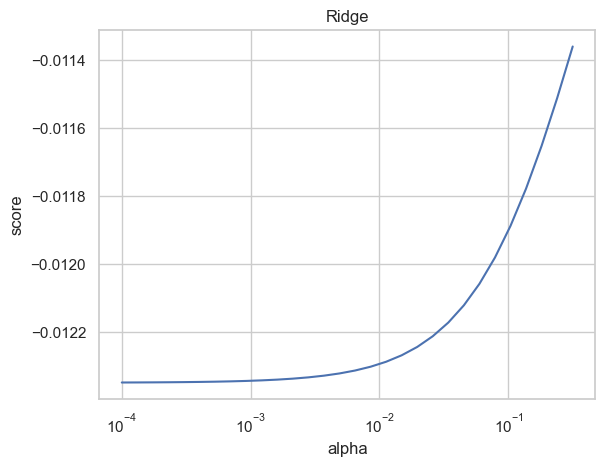

In [111]:
#alfanın hatalara  göre değişimi
plt.figure()
plt.semilogx(alphas, scores) 
        # alfayı yaratırken logspace kullandıgım için çizdiriken de semilogx kulandım
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")

# Regularization 2: Lasso Regression (L1)

In [114]:
# Also referred to as Lasso L1 regularization
# Ridge minimizes this --> least square error + lambda*(slope)^2
# Lasso minimizes this --> least square error + lambda*|slope|
# The difference in the formula is as above.
# Ridge vs Lasso difference?
# We can use the feature selection method in Lasso, that is, the coefficients of unnecessary features are assigned a zero value, but in the ridge, the coefficients are not assigned zero.
# If we see the coefficient of an independent variable as zero, we can say that this independent variable has no effect on the dependent variable, so there is no need to use these features.
# Another advantage of Lasso is that if we have highly correlated features, Lasso uses only one of them, the most important one, and assigns a zero value to the others.
# Lasso also prevents overfitting.

In [115]:
lasso = Lasso(random_state=42, max_iter=10000) # regresyon nesnemi olusturdum
alphas = np.logspace(-4, -0.5, 30) # alfa parametrelerimi olusturdum

In [116]:
tuned_parameters = [{'alpha': alphas}]
n_folds = 5

In [117]:
clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000, random_state=42),
             param_grid=[{'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01])}],
             scoring='neg_mean_squared_error')

In [118]:
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [119]:
print("Mean Test Score: ",clf.cv_results_["mean_test_score"])
print("Standard Test Score: ",clf.cv_results_["std_test_score"])

Mean Test Score:  [-0.01134853 -0.0113071  -0.01126573 -0.01122236 -0.01116531 -0.01109159

 -0.01104428 -0.01102352 -0.01099916 -0.01097853 -0.01096683 -0.01096201

 -0.01095815 -0.01091032 -0.01085024 -0.01098658 -0.01126838 -0.01178162

 -0.01222373 -0.01293955 -0.01397594 -0.01513392 -0.01693279 -0.02072824

 -0.02617869 -0.03221716 -0.04116889 -0.05652717 -0.08220243 -0.09114933]

Standard Test Score:  [0.00218615 0.00218992 0.00219292 0.00219985 0.0022104  0.00222642

 0.00223346 0.00218193 0.00211814 0.00204305 0.00195614 0.00186051

 0.00177316 0.00165721 0.00164208 0.00184735 0.00215469 0.00249581

 0.00256167 0.00268411 0.00322204 0.00415654 0.00568542 0.00737042

 0.00869631 0.00983746 0.01089367 0.01284606 0.01949666 0.01974744]


In [120]:
print("Lasso Coef: ",clf.best_estimator_.coef_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)
# When we look at the coefficients, we see 3 zeros, that is, lasso added zero to the coefficients of 3 variables.

Lasso Coef:  [-0.03758778 -0.08757891 -0.0646061  -0.02803523  0.0491826  -0.03359315

  0.071679    0.          0.         -0.01794883 -0.         -0.00408397

  0.04250482]

Lasso Best Estimator:  Lasso(alpha=0.004893900918477494, max_iter=10000, random_state=42)


In [121]:
# Lasso ile tahmin.
y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)
# hata oranımızı ridge e göre düşük geldi.

Lasso MSE:  0.01752159477082249


Text(0.5, 1.0, 'Lasso')

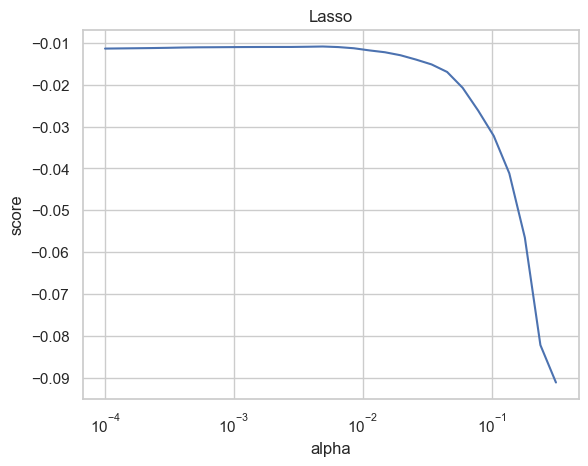

In [122]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

# Regularization 3: ElasticNet

In [124]:
# ElasticNet ; lasso and ridge are wife
# ElasticNet uses penalty terms of both lasso and Ridge regression.
# Ridge minimizes this --> least square error + lambda1(slope)^2
# Lasso minimizes this --> least square error + lamda2*|slope|
# Enet minimizes this --> least square error + lambda1*(slope)^2 + lambda2*|slope|
# The difference in the formula is as above.
# ElasticNet works well for extracting variables in highly correlated variables.

In [125]:
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}
# Enet 2 hiperparametre vardır.
# l1 ile L2 arasındaki oranı gösteren "l1_ratio" hiperparametresi için de en iyi değer seçilmelidir.

In [126]:
eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': array([1.00000000e-04, 1.32035178e-04, 1.74332882e-04, 2.30180731e-04,
       3.03919538e-04, 4.01280703e-04, 5.29831691e-04, 6.99564216e-04,
       9.23670857e-04, 1.21957046e-03, 1.61026203e-03, 2.12611233e-03,
       2.80721620e-03, 3.70651291e-03, 4.89390092e-03, 6.46167079e-03,
       8.53167852e-03, 1.12648169e-02, 1.48735211e-02, 1.96382800e-02,
       2.59294380e-02, 3.42359796e-02, 4.52035366e-02, 5.96845700e-02,
       7.88046282e-02, 1.04049831e-01, 1.37382380e-01, 1.81393069e-01,
       2.39502662e-01, 3.16227766e-01]),
                         'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring='neg_mean_squared_error')

In [127]:
print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)

ElasticNet Coef:  [-0.04521908 -0.07808085 -0.06742275 -0.024673    0.04776549 -0.03439345

  0.06689553  0.         -0.         -0.01879676 -0.         -0.00575413

  0.03999268]

ElasticNet Best Estimator:  ElasticNet(alpha=0.04520353656360245, l1_ratio=0.1, max_iter=10000,

           random_state=42)


In [128]:
# Enet ile tahmin.
y_predicted_dummy = clf.predict(X_test)

mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet MSE:  0.017496092493172515


In [129]:
# Let's Compare the Results

In [130]:
#StandardScaler() ile standartlaştırma yapıp bu hata sonuclarını elde ettik.

#    Linear Regression MSE:  0.020632204780133015
#    Ridge MSE:  0.019725338010801216
#    Lasso MSE:  0.017521594770822522
#    ElasticNet MSE:  0.01749609249317252

# RobustScaler() ile standartlaştırma işlemi yapınca da bu hata sonuclarını elde etim.
#    Linear Regression MSE:  0.020984711065869643
#    Ridge MSE:  0.018839299330570554
#    Lasso MSE:  0.016597127172690837
#    ElasticNet MSE:  0.017234676963922273  

# XGBOOST

In [132]:
# Parametrelerimi olusturuyorum
parametersGrid = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500,1000]}

In [133]:
model_xgb = xgb.XGBRegressor() # model nesnesini oluşturdum

In [134]:
clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error', refit=True, n_jobs = 5, verbose=True)

In [135]:
clf.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

[22:53:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.

[22:53:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 

Parameters: { "silent" } are not used.




GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_by

In [136]:
model_xgb = clf.best_estimator_
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, nthread=4, num_parallel_tree=None,
             objective='reg:linear', ...)

In [137]:
# XGBOOST ile tahmin
y_predicted_dummy = clf.predict(X_test)

# Hata bakıyorum
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

XGBRegressor MSE:  0.01732574388747416


# Average of Models

In [ ]:
# I will use Lasso and XGBOOST because they gave the two best results

In [139]:
class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  

In [140]:
# yukarıda olusturduğum fonksiyon ile modelimi kurucam
averaged_models = AveragingModels(models = (model_xgb, lasso))
averaged_models.fit(X_train, Y_train)

[22:57:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.

[22:57:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 

Parameters: { "silent" } are not used.




In [141]:
# Tahmin
y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)
# En düşük mse değerimi elde ettim.

Averaged Models MSE:  0.016235096717582283


# Comparing Results

In [ ]:
# If we standardize our data;
#Errors we will get by using StandardScaler;
#    Linear Regression MSE:  0.020632204780133015
#    Ridge MSE:  0.019725338010801216
#    Lasso MSE:  0.017521594770822522
#    ElasticNet MSE:  0.01749609249317252
#    XGBRegressor MSE: 0.017167257713690008
#    Averaged Models MSE: 0.016034769734972223

#The errors we will get if we use RobustScaler;
#    Linear Regression MSE:  0.020984711065869643
#    Ridge MSE:  0.018839299330570554
#    Lasso MSE:  0.016597127172690837
#    ElasticNet MSE:  0.017234676963922273
#    XGBRegressor MSE: 0.01753270469361755
#    Averaged Models MSE: 0.0156928574668921

# In summary, RobustScaler gave better results here.